In [13]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 300

# Libraries for Classification models
from sklearn.tree import DecisionTreeClassifier

In [14]:
def dataPreprocessing():
    # Loading dataset
    penguins_data = pd.read_csv('penguins.csv')
    # Preprocess
    penguins_data.dropna(inplace=True)
    penguins_data.drop(penguins_data.index[penguins_data['sex'] == '.'].tolist(),inplace=True)
    penguins_data['species']=penguins_data['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})
    penguins_data.reset_index(inplace=True)
    penguins_data.drop('index', axis=1, inplace=True)
    df_male = pd.get_dummies(data=penguins_data['sex'], drop_first=True)
    penguins_data = pd.concat([penguins_data,df_male], axis=1)
    df_island = pd.get_dummies(data=penguins_data['island'])
    penguins_data = pd.concat([penguins_data,df_island], axis=1)
    pgn = penguins_data.drop(['island','sex'], axis=1)
    
    X = pgn.drop('species', axis=1)
    y = pgn['species']

    return X, y

In [15]:
X, y = dataPreprocessing()
scaler = StandardScaler()
X = scaler.fit_transform(X)
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

In [16]:
tree_depth = clf.get_depth()
print("Tree depth:", tree_depth)

Tree depth: 5


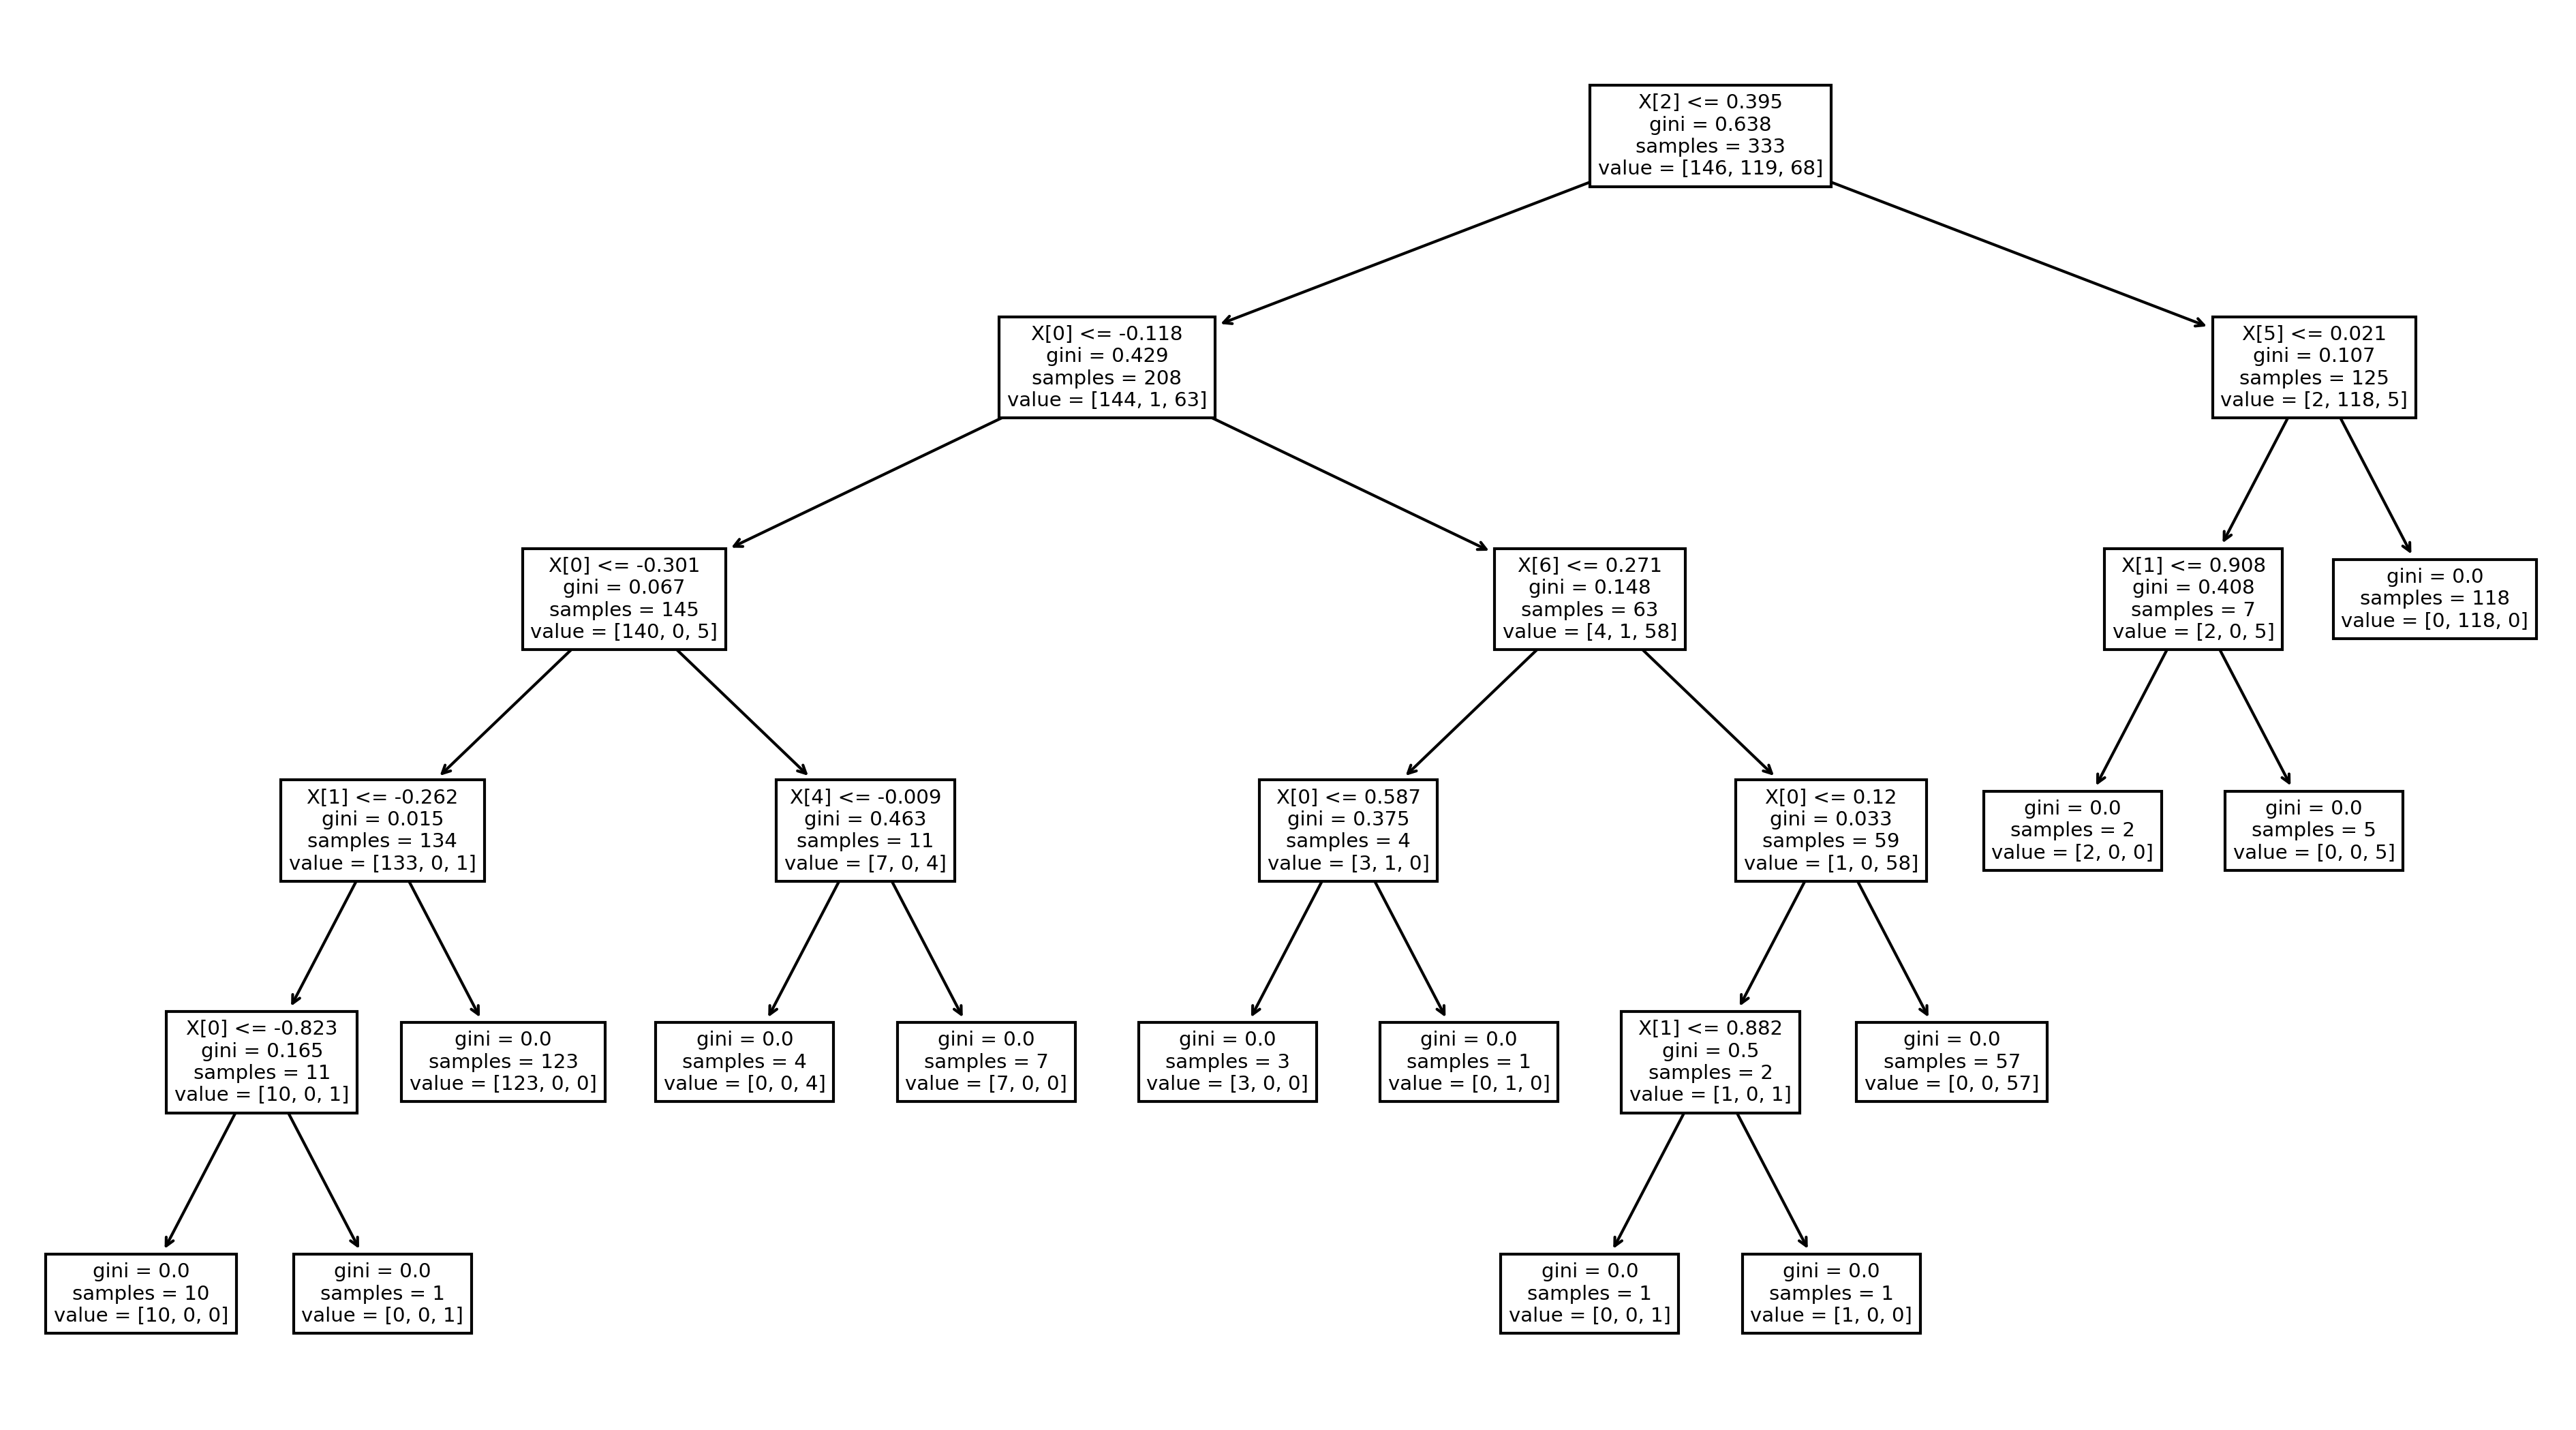

In [17]:
tree.plot_tree(clf)
plt.show()